# Datenvisualiserung

HIER NOCH BEISPIEL BILDER EINFÜGEN

Die Visualisierung von Daten ist ein wesentlicher Bestandteil der täglichen Arbeit jedes Data Analysts oder Data Scientists. Visualisierungen erfüllen dabei zwei wichtige Zwecke: Erstens helfen sie dabei, die Daten zu verstehen, noch bevor man mit der Datenbereinigung oder dem Training von Modellen beginnt. Zweitens dienen sie der anschaulichen Darstellung von Ergebnissen gegenüber den Stakeholdern.

In dieser Übung wirst Du an einem einfachen Beispiel lernen, selbst Visualisierungen zu erstellen.

Wir nehmen uns dazu den Aktienkurs von [Meta](https://de.wikipedia.org/wiki/Meta_Platforms) vor. Unser Ziel ist es, den Schlusskurs der letzten 30 Tage in einem Chart abzubilden. Der Schlusskurs ist der Preis, den eine Aktie nach Börsenschluss hat.

Die bekanntesten Python Bibliotheken zur Erstellung von Grakiken sind [Matplotlib](https://pydata.org/project/matplotlib/) und [Seaborn](https://seaborn.pydata.org/tutorial/introduction). Hier werden wir aber einen noch intuitivieren und einfacheren Weg kennenlernen, der sich besonders zur ersten Analyse eignet: Das Plotten von Visualisierungen direkt mit [Pandas](https://pandas.pydata.org/).

In [1]:
# Imporiere Pandas
import pandas as pd

### CSV-Dateien

Zunächst laden wir die Kursdaten der letzten 30 Tage im CSV-Format herunter. Dazu rufst Du [diese Seite der NASDAQ](https://www.nasdaq.com/market-activity/stocks/meta/historical) auf klickst auf *Download Data*.  
- Navigiere im Speichermenü zu dem Ordner, in dem sich dieses Notebook befindet.
- Benenne die Datei dabei um in `data.csv`.
- Kontrolliere, ob Du die csv Datei korrekt abgespeichert hast, indem Du folgende Zelle ausführst.

In [2]:
# Führe die Zelle aus
![ -f data.csv ] && echo "Bravo! Die CSV-Datei existiert!" || echo "Da ist etwas schief gelaufen. Probiere es noch einmal."

Bravo! Die CSV-Datei existiert!


Hinweis: Damit wir uns für diese Übung keine Gedanken über Dateipfade machen müssen, haben wir für die CSV-Datei einen Speicherort direkt neben diesem Notebook gewählt. In umfangreicheren Projekten werden CSV-Dateien oft in einem Unterordner namens `data` abgelegt. Wenn du schon jetzt mehr über die Strukturierung von Data-Science-Projekten erfahren möchtest, kannst du hier auf Englisch eine [bewährte Vorgehensweise zur Projektstrukturierung](https://drivendata.github.io/cookiecutter-data-science/?#directory-structure) nachlesen.

Nun haben wir die Daten, die Du auf der NASDAQ-Seite als Tabelle gesehen hast, im CSV-Format direkt für unsere Analysen verfügbar. Aber was ist überhaupt eine CSV-Datei? Öffne sie und vergleiche sie mit der tabellarischen Ansicht auf der NASDAQ-Seite. Was fällt Dir auf?

<details>
  <summary>Lösung</summary>

  - CSV-Dateien sind lesbar und verständlich für Menschen.</br>

  - CSV-Dateien bestehen aus Zeilen und Spalten, wobei jeder Wert durch ein Trennzeichen, normalerweise ein Komma, getrennt ist.</br>

  - In der ersten Reihe befinden sich die Spaltenüberschriften. Jede Spalte repräsentiert eine bestimmte Art von Daten. </br>

 CSV steht für "Comma-Separated Values" und ist ein Dateiformat zur Speicherung tabellarischer Daten.

</details>

### Einlesen von CSV-Dateien als Pandas DataFrame

Um die CSV-Datei `data.csv ` in einen Pandas DataFrame zu laden, verwenden wir die Methode `read_csv()`. Schaue die [Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) der Methode an und versuche `data.csv` in einen DataFrame zu laden. Speichere den DataFrame als `df`.

<details>
  <summary>Tipp</summary>
  
Ganz am Ende der Dokumentation findest Du ein Beispiel.
</details>

In [3]:
# Dein Code hier

df = pd.read_csv('data.csv')  

Du kannst nun den DataFrame `df` verwenden, um auf die Daten zuzugreifen.</br></br>
Schaue Dir den DataFrame einmal an, indem Du seinen Variablennamen aufrufst. Wie heißt die Spalte, die den Schlusskurs enthält?

In [4]:
# Dein Code hier

df

,Date,Close/Last,Volume,Open,High,Low
0,05/10/2023,$233.08,19119010,$236.17,$236.75,$230.72
1,05/09/2023,$233.37,16865590,$231.46,$235.88,$231.08
2,05/08/2023,$233.27,16400530,$231.415,$235.62,$230.27
3,05/05/2023,$232.78,27000480,$232.24,$234.68,$229.85
4,05/04/2023,$233.52,17889390,$236.06,$238.20,$232.9264
5,05/03/2023,$237.03,34463860,$239.47,$241.75,$232.75
6,05/02/2023,$239.24,24350150,$243.18,$244.92,$238.99
7,05/01/2023,$243.18,29143910,$238.615,$244.00,$236.46
8,04/28/2023,$240.32,39554040,$239.01,$240.43,$235.75
9,04/27/2023,$238.56,71196530,$239.89,$241.685,$236.77


 Der Schlusskurs ist in der Spalte `Close/Last` gespeichert.
 
 Vielleicht ist Dir aufgefallen, dass wir nicht für alle der vergangenen 30 Tagen Daten haben. Das ist normal. Historische Kursdaten mit Schlusskursen sind in der Regel nur für Montag bis Freitag verfügbar, weil die meisten Börsen weltweit an diesen Tagen geöffnet sind. Weil das aber so ist, müssen wir unseren Schlusskurs unbedingt in Abhängigkeit des dazugehörigen Datums plotten. Das heißt, wir müssen sicherstellen, dass die Daten aus der Spalte `Date` auch als Datum interpretiert werden.

 Überprüfe daher zunächst, welche Datentypen unser DataFrame hat.

 <details>
  <summary>Tipp</summary>
  
Verwende das Attribut [`dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html).
</details>

In [5]:
# Dein Code hier

df.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

### Datentypen
Die Spalten `Date` und `Close/Last` haben den Datentyp `object`, beinhalten also strings. 

Wie können wir festlegen, dass `Date` als Datum und `Close/Last` als numerischer Wert interpretiert werden?

In Pandas gibt es die Methoden `pd.to_numeric()` und `pd.to_datetime()`. Sie können auf einzelne Spalten (sogenannte `series`) des DataFrames angewendet werden und verändern deren Datentyp.

Bevor wir einer Spalte jedoch als numerischen Datentyp umdefinieren können, müssen wir dafür sorgen, dass ihre strings nur Zahlen enthalten.</br></br>
Erinnerst Du Dich an the string Methode `strip()`? Hier ein Beispiel, wie sie funktioniert:

In [19]:
# Führe die Zelle aus
txt = "22..//Aye-Aye....))"
x = txt.strip(".2/)")
print(x) 

Aye-Aye


Zwischen`("` und `")` kannst Du alle Zeichen definieren, die von rechts und links aus dem string entfernt werden sollen. Füge einen Bindestrich (`-`) hinzu und schaue, was passiert.

Eine ähnliche Methode gibt es für Pandas series. Sie entfernt jedoch nicht nur ungewollte Zeichen aus einem string, sondern aus jedem string in einer Spalte des DataFrames.

Suche im Internet nach der Dokumentation und entferne aus der Spalte `Close/Last` das vorangestellte Dollar-Symbol. Denke daran, die veränderte Serie wieder im DataFrame zu speichern.

In [7]:
# Dein Code hier

df['Close/Last'] = df['Close/Last'].str.strip("$")

Nutze nun die Methode [pd.to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html), um die den Datentyp der Spalte zu verändern. In der Dokumentation findest Du einige Beispiele.

In [8]:
# Dein Code hier

df['Close/Last'] = pd.to_numeric(df['Close/Last'])

Für einen schnellen Check Deiner bisherigen Arbeit kannst Du [pd.series.plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) verwenden. Versuche es einmal.</br></br>

 <details>
  <summary>Was stellst Du fest?</summary>
  
- Das Liniendiagramm zeigt den Schlusskurs für alle Handelstage.

- Die x-Achse orientiert sich nicht am Datum, sondern an der Reihenfolge im DataFrame.

- Der neueste Eintrag wird auf der linken Seite des Diagramms dargestellt, während der älteste Eintrag auf der rechten Seite visualisiert wird.

- Unabhängig von der Verteilung von Handelstagen (nur Montag bis Freitag) und Ruhetagen sind die Werte gleichmäßig verteilt, wodurch eine verzerrte Darstellung entsteht.

</details>

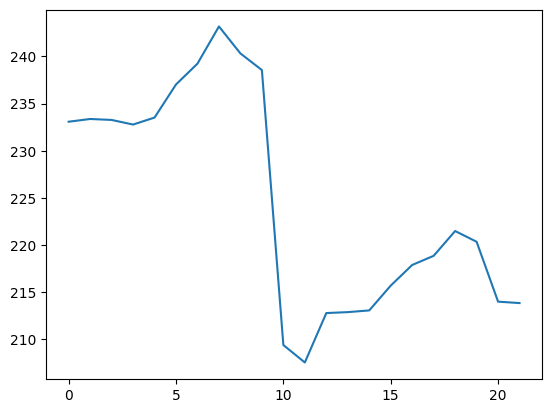

In [9]:
# Dein Code hier

df['Close/Last'].plot();

Kein zufriedenstellendes Ergebnis, oder?</br>

Um die Daten auf der x-Achte korrekt darzustellen, müssen wir den Datentyp der Spalte `Date` in ein Datum umwandeln.

Verwende dazu die Methode [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) und kontrolliere anschließend die Datentypen des DataFrames.

In [10]:
# Dein Code hier

df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

Stimmen die Datentypen? Herzlichen Glückwunsch! Du bist Deinem Ziel, den Aktienkurs von Meta zu visualisieren, bedeutend näher gekommen!</br></br>

### Indizes

Wie können wir nun mit [pd.series.plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) den Schlusskurs in Abhängigkeit des Datum in einem Chart abbilden? Schaue Dir unseren ersten Plot noch einmal an. Hast Du eine Idee?

 <details>
  <summary>Antwort</summary>
  
Der Grund dafür, dass die x-Achse in unserem ersten Plot von 0 bis 21 beschriftet ist, liegt darin, dass der Index des DataFrames von 0 bis 21 verläuft. Der Index eines Pandas DataFrames ist eine spezielle Spalte, die jedem Datensatz eine eindeutige Kennung zuweist und es ermöglicht, auf die Daten basierend auf dieser Kennung effizient zuzugreifen. Er wird immer ganz links angezeigt:

</details>

In [11]:
# Führe die Zelle aus

df['Close/Last']

0     233.08
1     233.37
2     233.27
3     232.78
4     233.52
5     237.03
6     239.24
7     243.18
8     240.32
9     238.56
10    209.40
11    207.55
12    212.79
13    212.89
14    213.07
15    215.70
16    217.89
17    218.86
18    221.49
19    220.35
20    214.00
21    213.85
Name: Close/Last, dtype: float64

Die Lösung ist also, dass die Spalte `Date` zum Index werden muss.</br></br>

Recherchiere im Internet, wie man in Pandas einen Index setzt und lasse `Date` zum Index werden.

 <details>
  <summary>Tipp</summary>
  
Verwende [pd.set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html).

</details>


In [12]:
# Dein Code hier:

# df.set_index('Date', inplace=True)
df.set_index('Date')

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-05-10,233.08,19119010,$236.17,$236.75,$230.72
2023-05-09,233.37,16865590,$231.46,$235.88,$231.08
2023-05-08,233.27,16400530,$231.415,$235.62,$230.27
2023-05-05,232.78,27000480,$232.24,$234.68,$229.85
2023-05-04,233.52,17889390,$236.06,$238.20,$232.9264
2023-05-03,237.03,34463860,$239.47,$241.75,$232.75
2023-05-02,239.24,24350150,$243.18,$244.92,$238.99
2023-05-01,243.18,29143910,$238.615,$244.00,$236.46
2023-04-28,240.32,39554040,$239.01,$240.43,$235.75


Testen wir nun, ob es geklappt hat:

In [20]:
# Führe die Zelle aus
assert type(df.index) == pd.core.indexes.datetimes.DatetimeIndex, 'Der Index ist nicht im Datetime Format.'

Wenn die obige Zelle einen Fehler aufgeworfen hat, dann liegt es daran, dass die Änderung nicht in unserem DataFrame `df` gespeichert wurde.</br></br>
Schaue in der Dokumentation von [pd.set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) das Argument `inplace` an und bessere Deinen Code nach.

In [14]:
# Dein Code hier

df.set_index('Date', inplace=True)

Nun sollte der Test keinen Alarm mehr schlagen:

In [15]:
# Führe die Zelle aus
assert type(df.index) == pd.core.indexes.datetimes.DatetimeIndex, 'Der Index ist nicht im Datetime Format.'

Plotte die Spalte `Close/Last` erneut. Du kannst den gleichen Code verwenden wie oben. Vergleiche die beiden Ergebnisse.

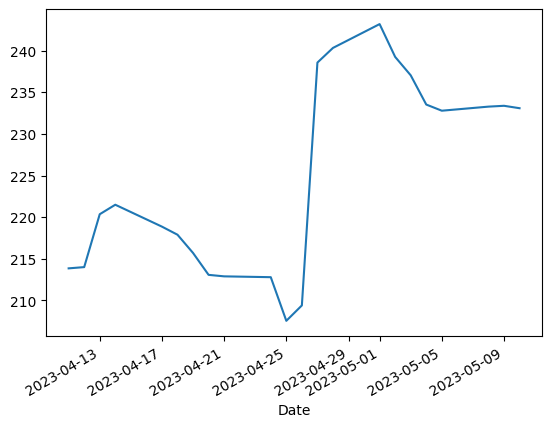

In [16]:
# Dein Code hier

df['Close/Last'].plot();

Nun ist der Chart instinktiv interpretierbar: Die x-Achse ist mit Daten beschriftet und die Daten sind allgemeiner Lesart folgend von links nach rechts vom ältesten zum neuesten angeordnet.</br></br>

Fehlt noch etwas?</br></br>

### Eine Visualisierung benutzerfreundlich machen

Damit jeder auf den ersten Blick erkennen kann, worum es hier geht, sollten wir eine Überschrift und Achsenbeschriftung einfügen. Die [pd.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) Methode hat die Parameter `title`, `xlabel` und `ylabel`, die alle als string angegeben werden können. Erstelle einen neuen Plot, indem Du diese drei Parameter definierst.

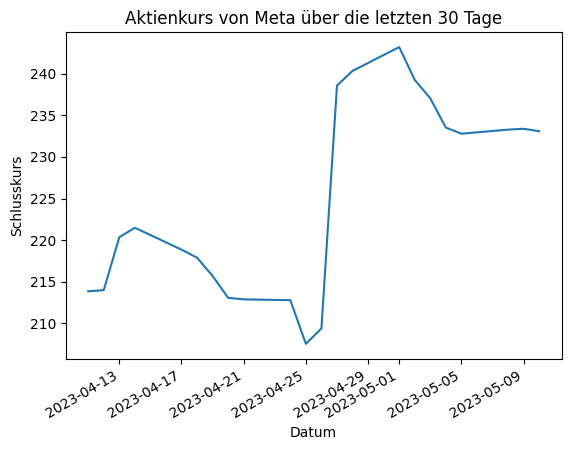

In [17]:
# Dein Code hier

df['Close/Last'].plot(title='Aktienkurs von Meta über die letzten 30 Tage', 
                      xlabel='Datum',
                      ylabel='Schlusskurs');

### Hurra! Deine erste Visualisierung ist fertig.

Wenn Du mehr über das Visualisieren mit Pandas lernen möchtest, schau einmal in das [Plotting Tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html) des Projekts. Dort siehst Du, dass Du auch mehrere Spalten gleichzeitig drucken oder den Typ des Charts verändern kannst. Auch können mehrere Grafiken unter einem Plot vereint werden (`subplot`).</br></br>

Im letzten Schritt dieses Notebooks hast Du die Möglichkeit, mit den neuen Fähigkeiten herumzuspielen. Plotte zum Beispiel den höchsten Tageskurs gegen den niegrigsten Tageskurs und füge Gitterlinien hinzu, vergrößere die Grafik oder verändere die Farben der Linien. Du kannst in [pandas.plotting](https://pandas.pydata.org/docs/reference/plotting.html) auch viele fortgeschrittenere Visualisierungstools finden, etwa den `lag_plot` zur Darstellung von Autokorrelationen in Zeitreihen wie dieser.

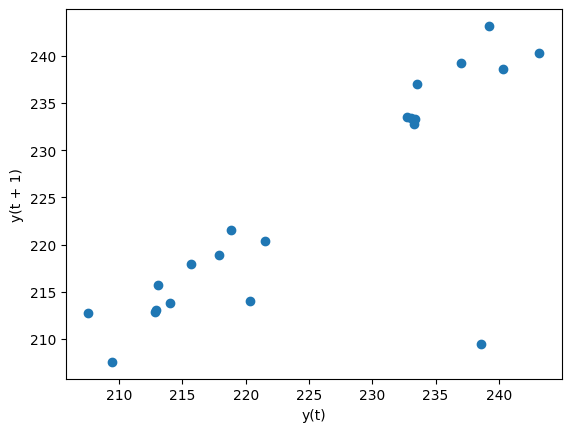

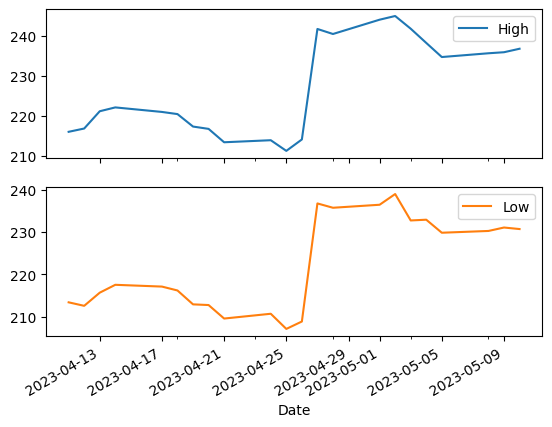

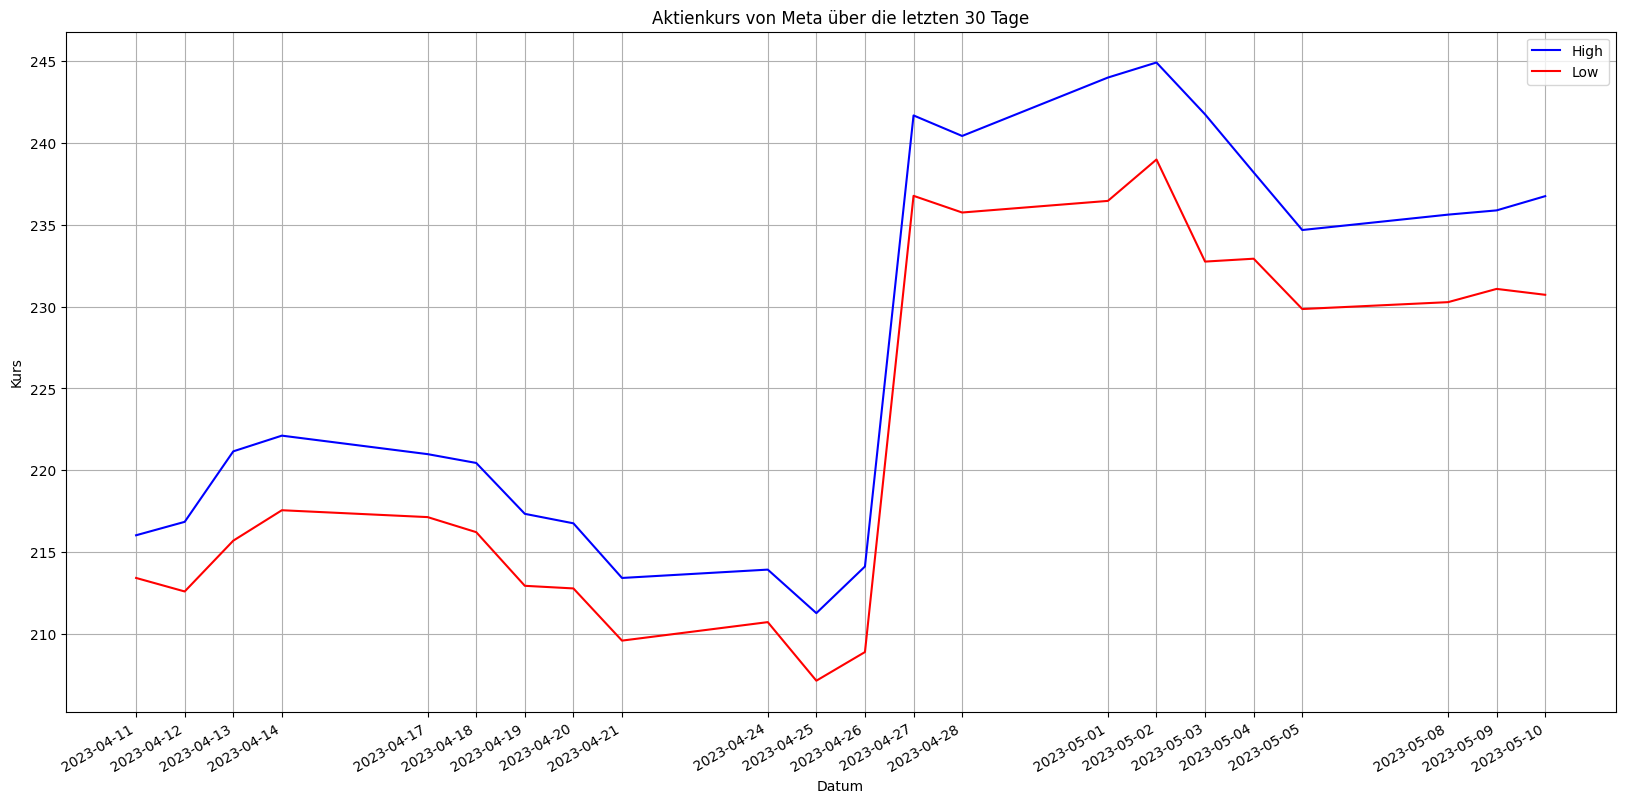

In [18]:
# Dein Code hier

# Hier gibt es keine Vorgaben. Eine mögliche Umsetzung könnte so aussehen:

df['High']= df['High'].str.strip("$")
df['Low']= df['Low'].str.strip("$")
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])

pd.plotting.lag_plot(df['Close/Last']);

df[['High', 'Low']].plot(subplots=True);

df[['High', 'Low']].plot(figsize=(20,10),
                         xticks=df.index,
                         style=['b','r'],
                         grid=True,
                         title='Aktienkurs von Meta über die letzten 30 Tage', 
                         xlabel='Datum',
                         ylabel='Kurs');